In [105]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exp = 'results2.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
print(type(df))
df = df.loc[df['labeled']==False]
const = 0.029
df['bayes_error'] = np.mean(df['bayes_error']) - const
df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

<class 'pandas.core.frame.DataFrame'>


kernel_df                 int64
beta                      int64
bayes_error             float64
n_source                  int64
n_target                  int64
labeled                    bool
classical                object
supervised               object
lipton                   object
oracle                   object
prop-target-estimate     object
iter                      int64
setup                    object
lipton-excess           float32
oracle-excess           float32
dtype: object

In [106]:
measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)
result

n_source n_target lipton-excess           oracle-excess          
                              mean       std          mean       std
0        20      100      0.424902  0.073416      0.172382  0.027492
1        40      100      0.336162  0.065054      0.144762  0.018793
2        80      100      0.195022  0.073916      0.118062  0.016233
3       160      100      0.105022  0.033551      0.084862  0.012217
4       320      100      0.058562  0.014900      0.054962  0.010848
5       640      100      0.030922  0.008322      0.030892  0.008222
6      1000       20      0.024932  0.011788      0.021382  0.007228
7      1000       40      0.021342  0.007987      0.021472  0.007779
8      1000       80      0.020002  0.008125      0.020222  0.008020
9      1000      160      0.021362  0.008064      0.021592  0.007723
10     1000      320      0.020412  0.007839      0.020852  0.008028
11     1000      640      0.019512  0.008291      0.019622  0.007976
12     1000     1280      0.020082  0.007871      0.020612  0.007949
13     1280      100      0.015962  0.006896      0.016192  0.006759
14     2560      100      0.003532  0.006614      0.004052  0.006427

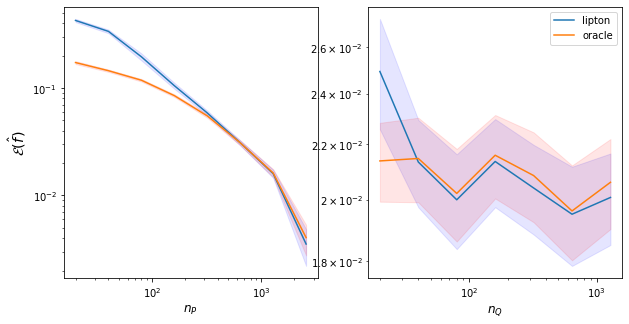

In [108]:
result1 = result.loc[result['n_target'] == 100]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 1000]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()

In [109]:
exp = 'results2.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
print(type(df))
df = df.loc[df['labeled']==True]
const = 0.038
df['classical-excess'] = (df['classical'] - df['bayes_error']).astype('float32') + const
df['labeled-excess'] = (df['supervised'] - df['bayes_error']).astype('float32') + const

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

<class 'pandas.core.frame.DataFrame'>


n_source n_target classical-excess           labeled-excess          
                                 mean       std           mean       std
0        40       40         0.256288  0.028885       0.138118  0.019489
1       160       10         0.435423  0.074625       0.108763  0.039563
2       160       60         0.221564  0.030155       0.086484  0.014017
3       160      160         0.133643  0.017187       0.079073  0.010979
4       160      360         0.086136  0.013217       0.067156  0.011599
5       160      760         0.052725  0.011184       0.051685  0.009674
6       160     1560         0.033626  0.007418       0.038516  0.006547
7       240       40         0.265102  0.038034       0.073582  0.010879
8       640       40         0.266212  0.037122       0.042072  0.009399
9      1440       40         0.270815  0.036602       0.021505  0.007791
10     3040       40         0.262917  0.035222       0.011407  0.007301
11     6240       40         0.260434  0.032874       0.004824  0.006067

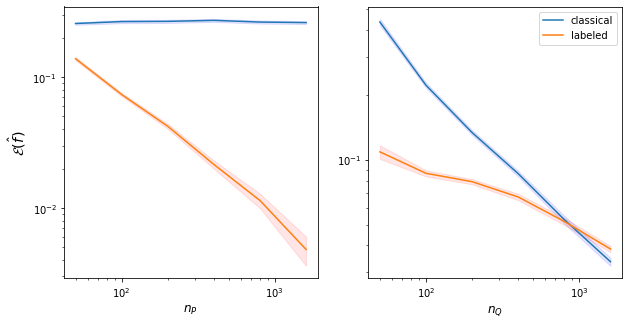

In [110]:
result1 = result.loc[result['n_target'] == 40]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source']/4 + result1['n_target'], result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 160]

n, mean, std = result2['n_target'] + result2['n_source']/4, result2['classical-excess']['mean'], result2['classical-excess']['std']
mean_o, std_o = result2['labeled-excess']['mean'], result2['labeled-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('classical', 'labeled'), loc='middle left')
plt.show()

In [103]:
n

1      30.0
2      80.0
3     180.0
4     380.0
5     780.0
6    1580.0
7    3180.0
8    6380.0
dtype: float64